In [1]:
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))  # You are currently in "/Jupyter" folder
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

from JsonMidiCreator import *

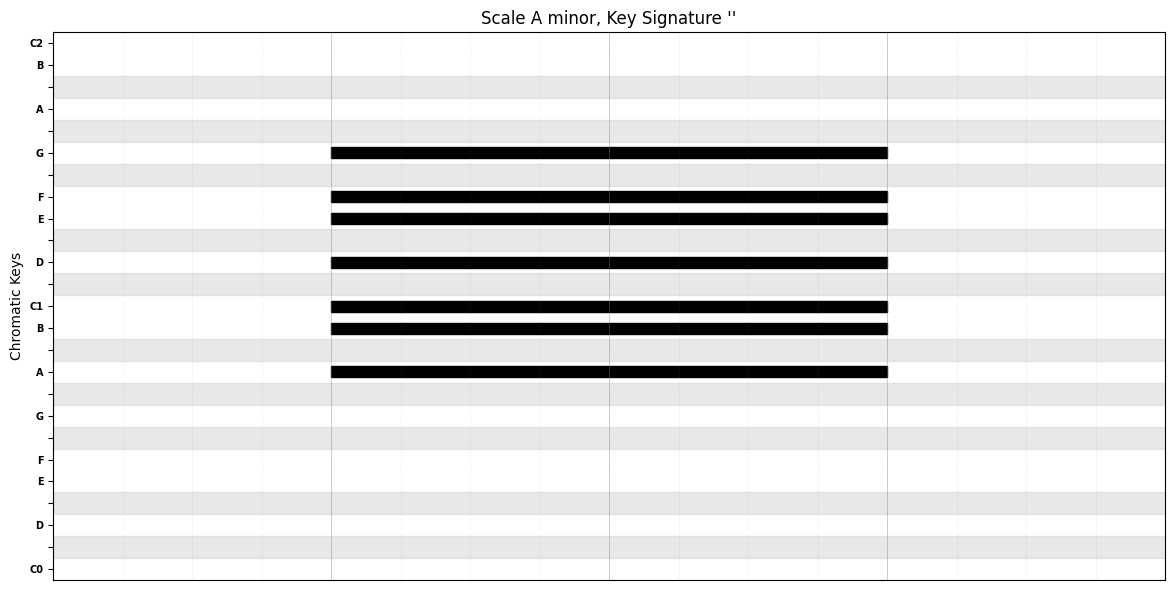

In [2]:
settings << Tempo(50) << Minor()   # Minor will mean the A as the default Tonic Key !
settings % KeySignature() >> Plot()

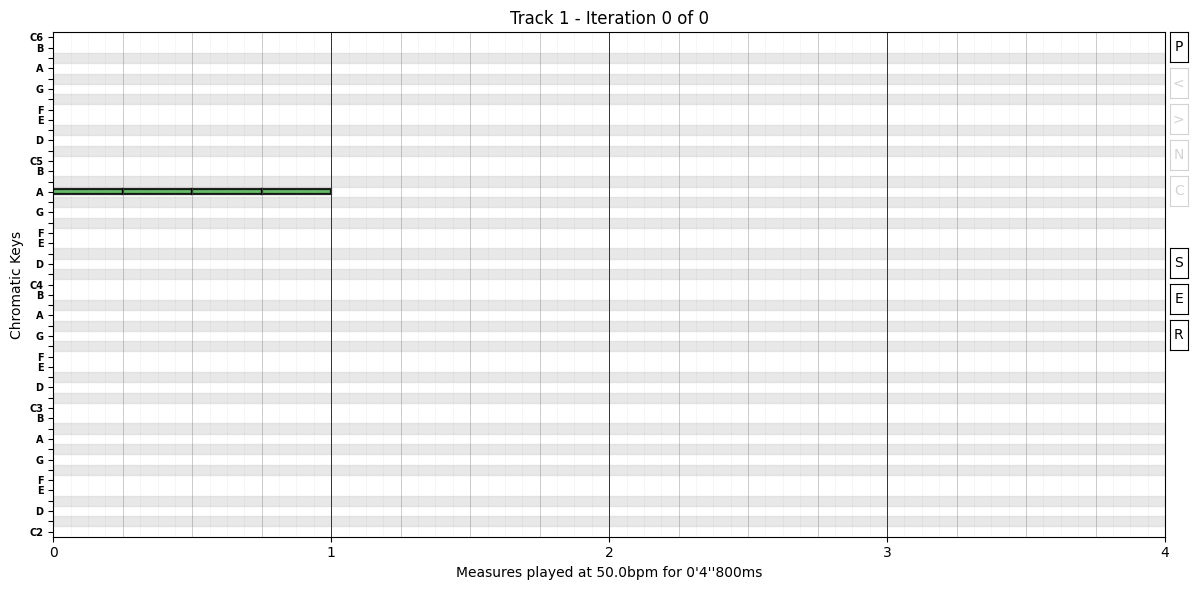

In [3]:
treble_melody = Note() / 4
treble_melody >> Plot()

[1.0, 5.0, 6.0, 7.0]


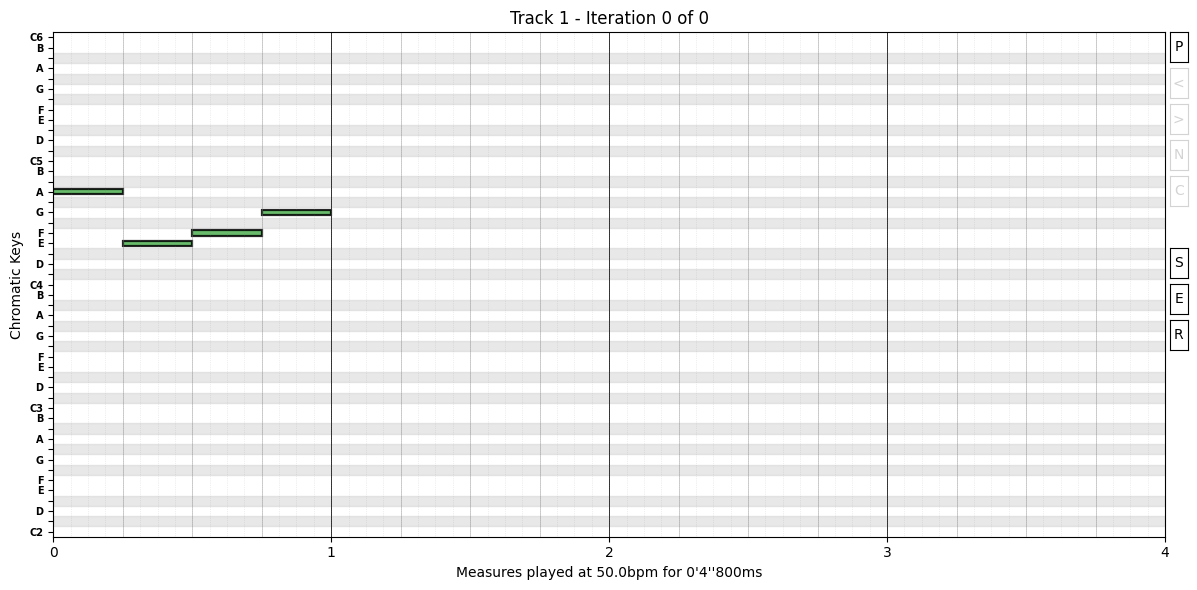

In [4]:
# Sets the Root Note for each Beat
treble_melody << Foreach("A", "E", "F", "G")**RootKey()
treble_melody % [Degree(), float()] >> Print()
treble_melody >> Plot()

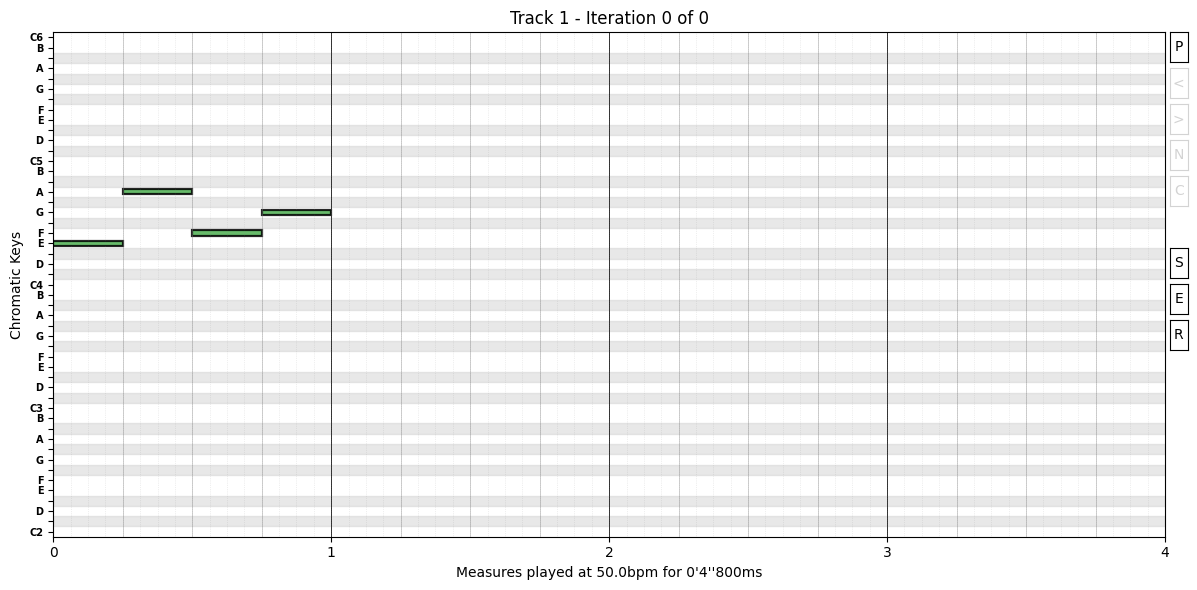

In [5]:
# This small snippet shows how easy it is to swap elements by a given paramater (Position by default)
treble_copy = ~treble_melody
treble_copy.swap(0, 1) >> Plot()

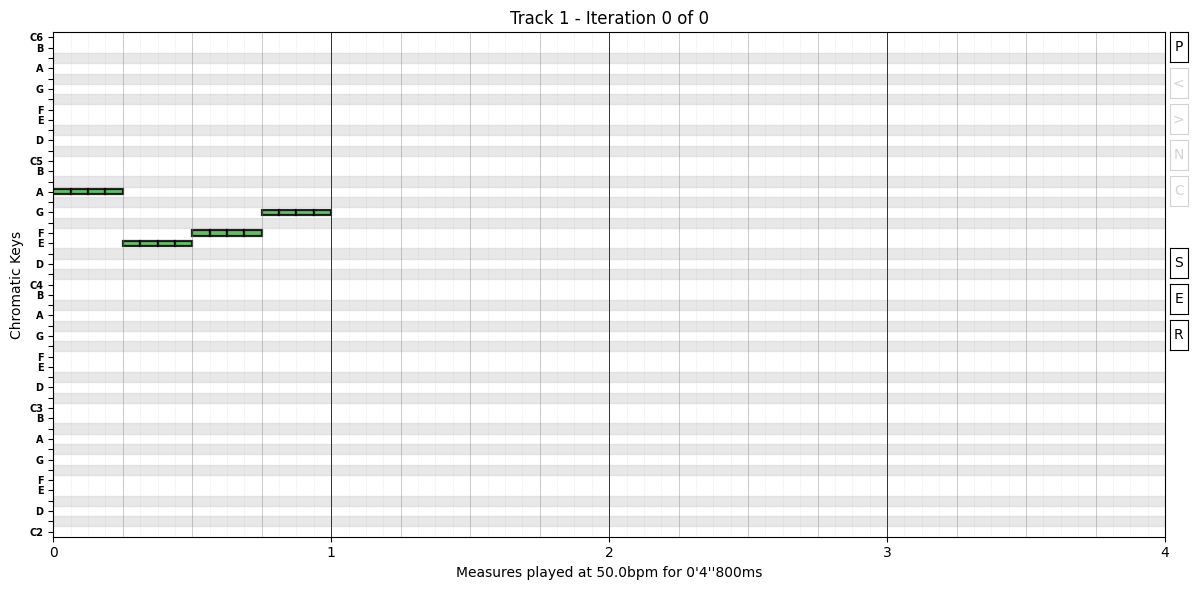

In [6]:
# Splits all notes by a duration of a single Step, equal to 1/4 of a Beat by default
treble_melody //= Steps(1)
treble_melody >> Plot()

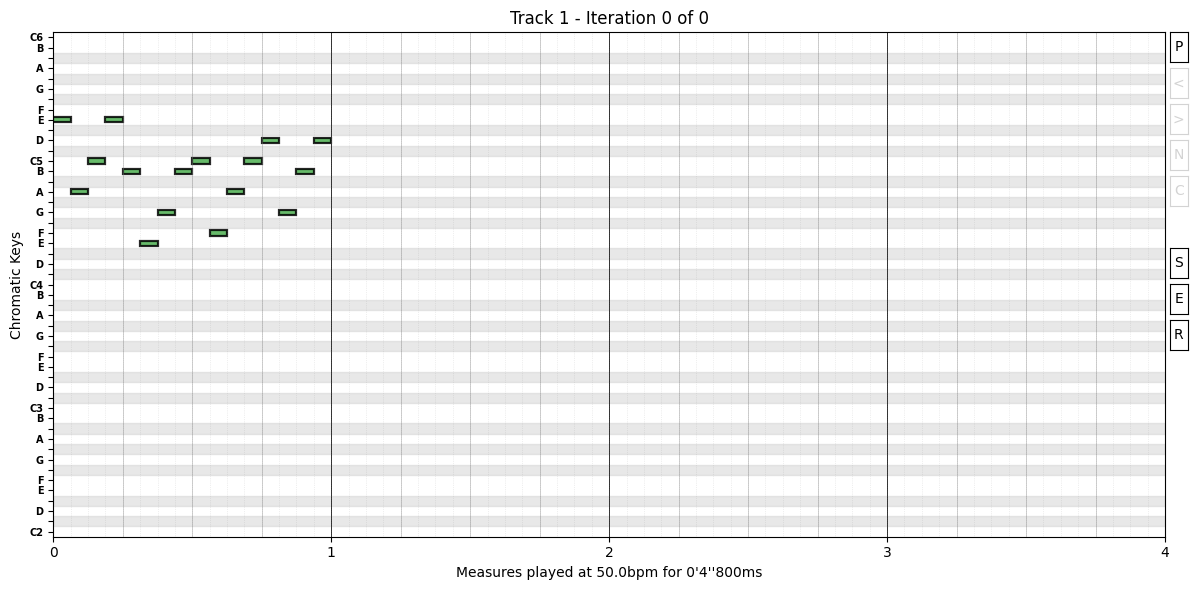

In [7]:
# Offsets the notes up the respective Degrees by multiples of 2
treble_melody += Foreach(2, 0, 1, 2)**Multiply(2)**Degree()
treble_melody >> Plot()

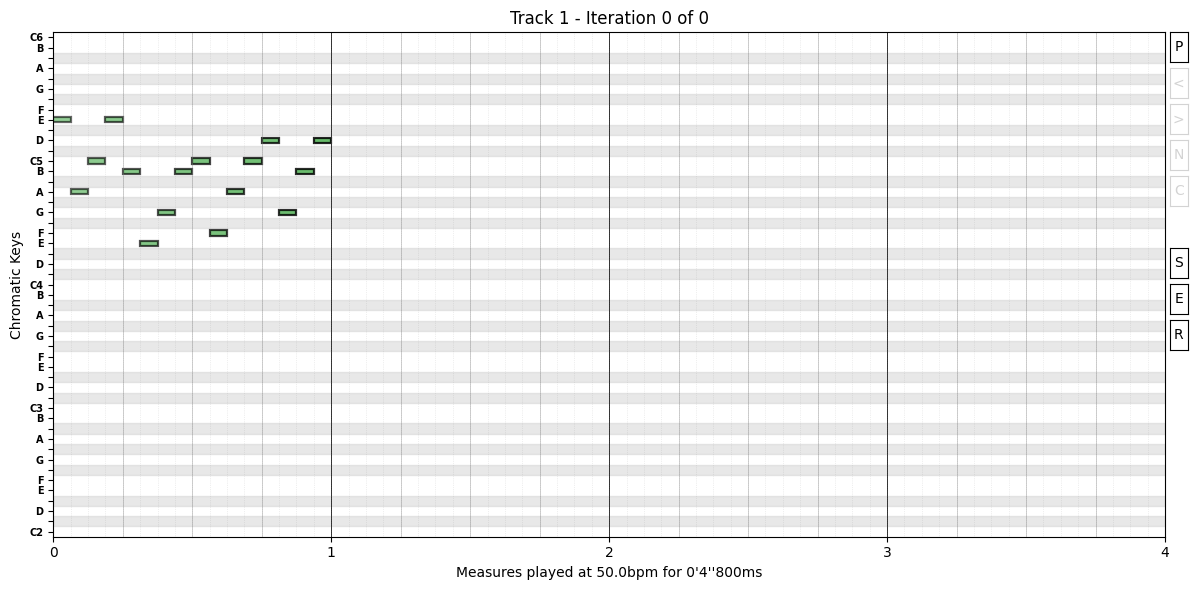

In [8]:
# Setting a Crescendo based on Step Position
treble_melody << Get(Step())**Multiply(3)**Add(55)**Velocity()
treble_melody >> Plot()

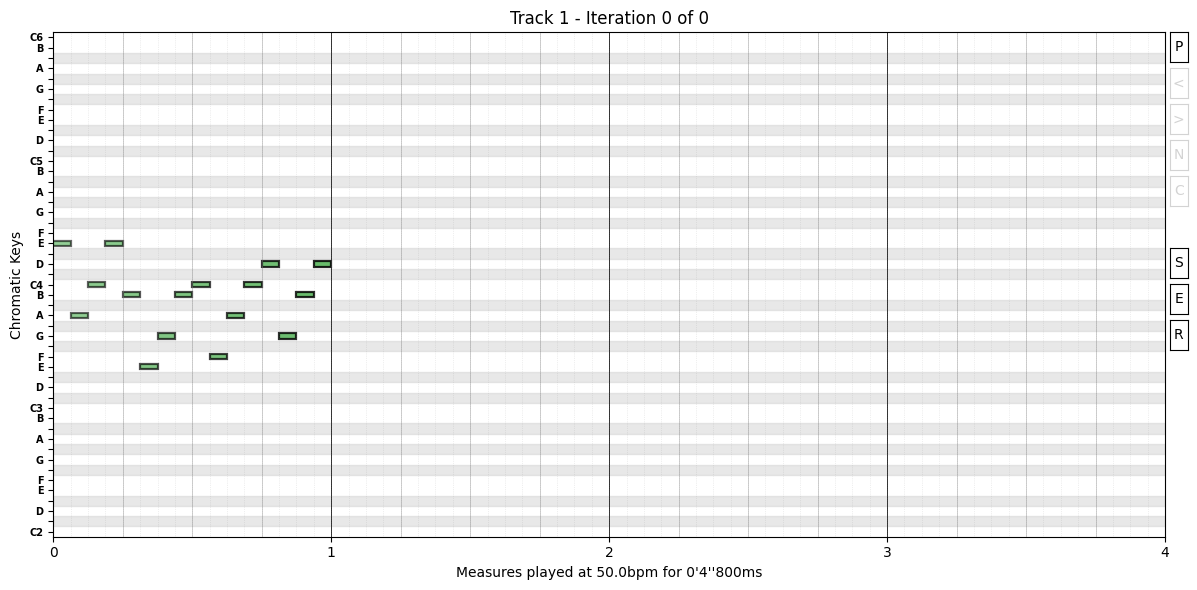

In [9]:
# Basic operations reult in implicit copies from left and right operands
bass_melody = treble_melody - Octave(1)
bass_melody >> Plot()

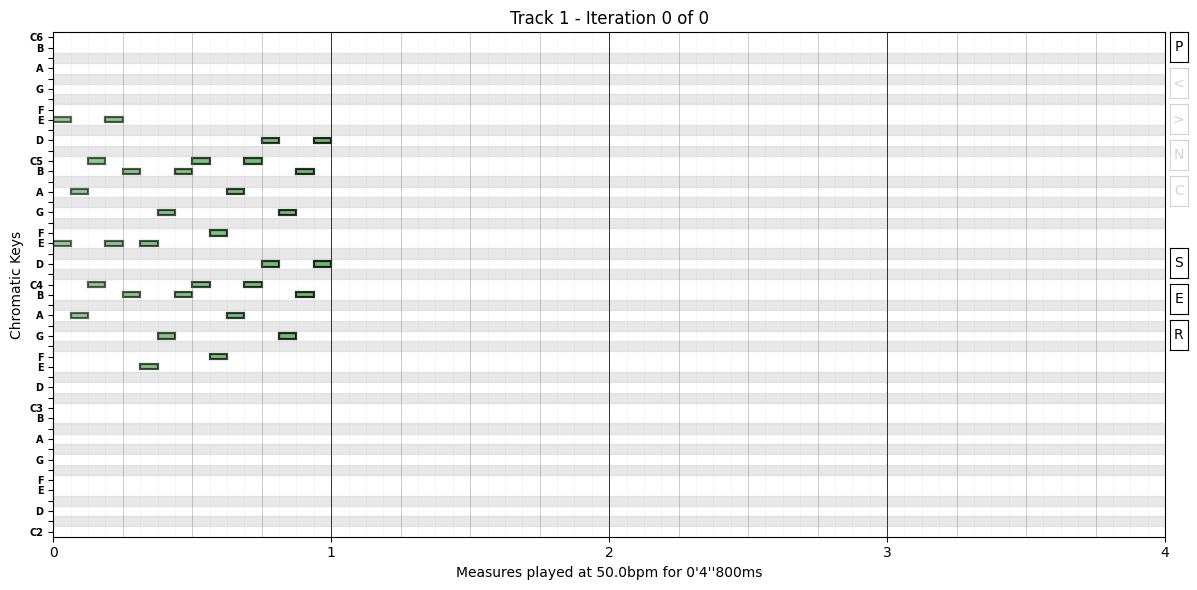

In [10]:
first_melody = treble_melody + bass_melody
first_melody >> Plot()

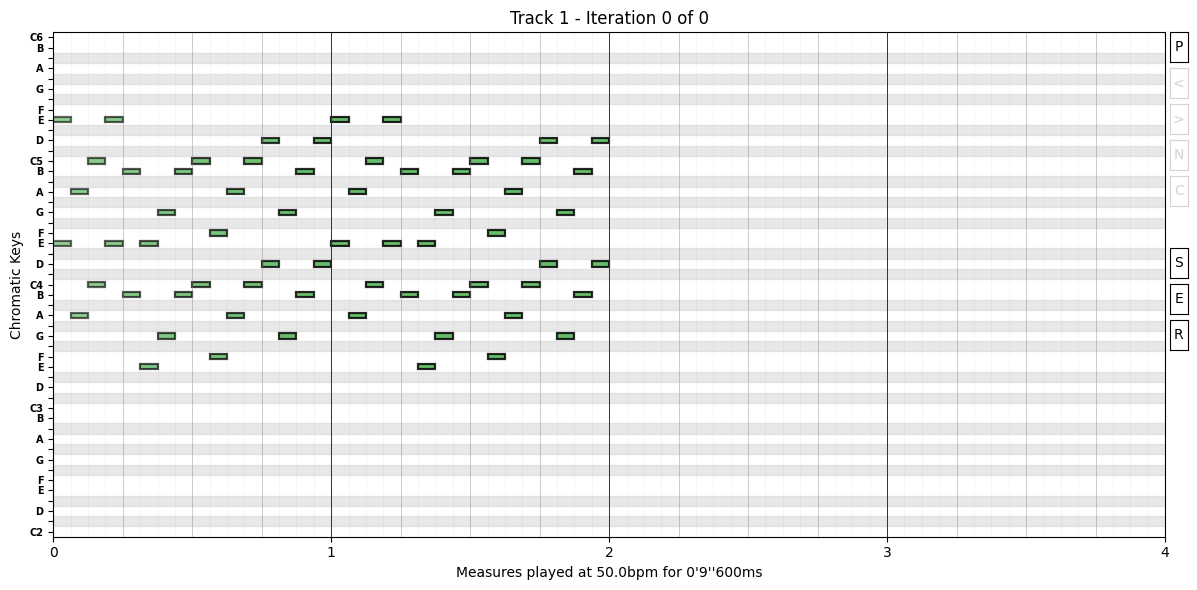

In [11]:
# Inline operations, like `=*`, preserve the left operand and do not result in any copy, except for the right operands
first_melody *= 2
first_melody << Equal(Measure(1))**Velocity( first_melody[Last()] )
first_melody >> Plot()

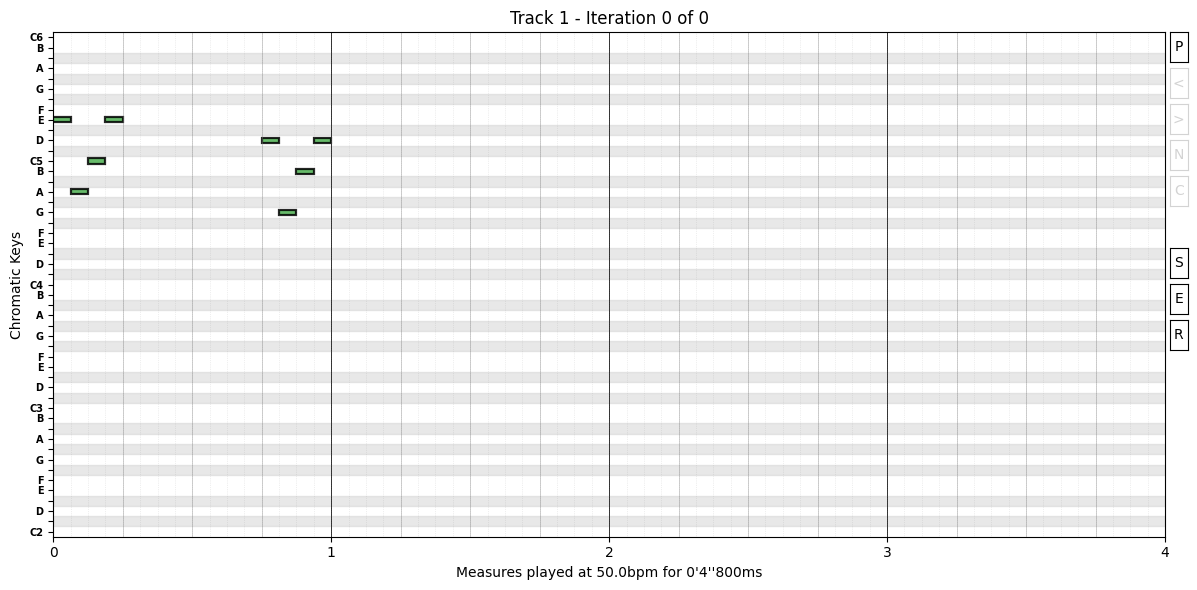

In [12]:
outer_notes = treble_melody - treble_melody.copy().filter(Or(Beat(1), Beat(2)))
outer_notes << Velocity( treble_melody[Last()] ) >> Plot()

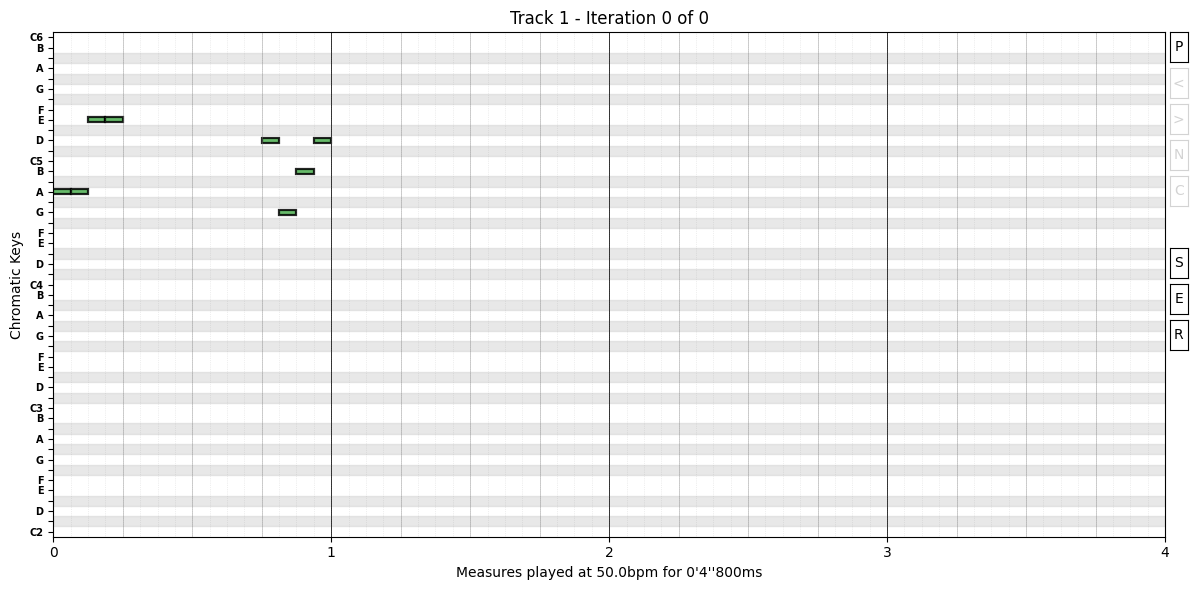

In [13]:
outer_notes << Mux(2)**Once("A", "E")**RootKey() << Mux(2)**Once(4, 5)**Octave()
outer_notes >> Plot()

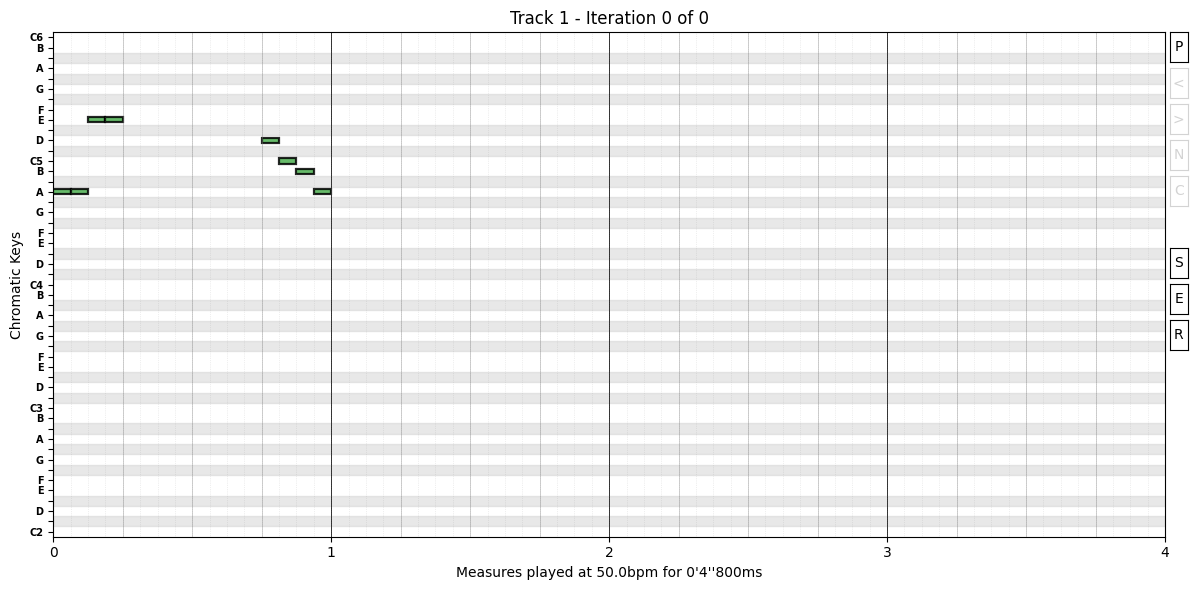

In [14]:
outer_notes.mask(Beat(3)) << Previous()**Get(Pitch())**Subtract(1.0)
outer_notes >> Plot()

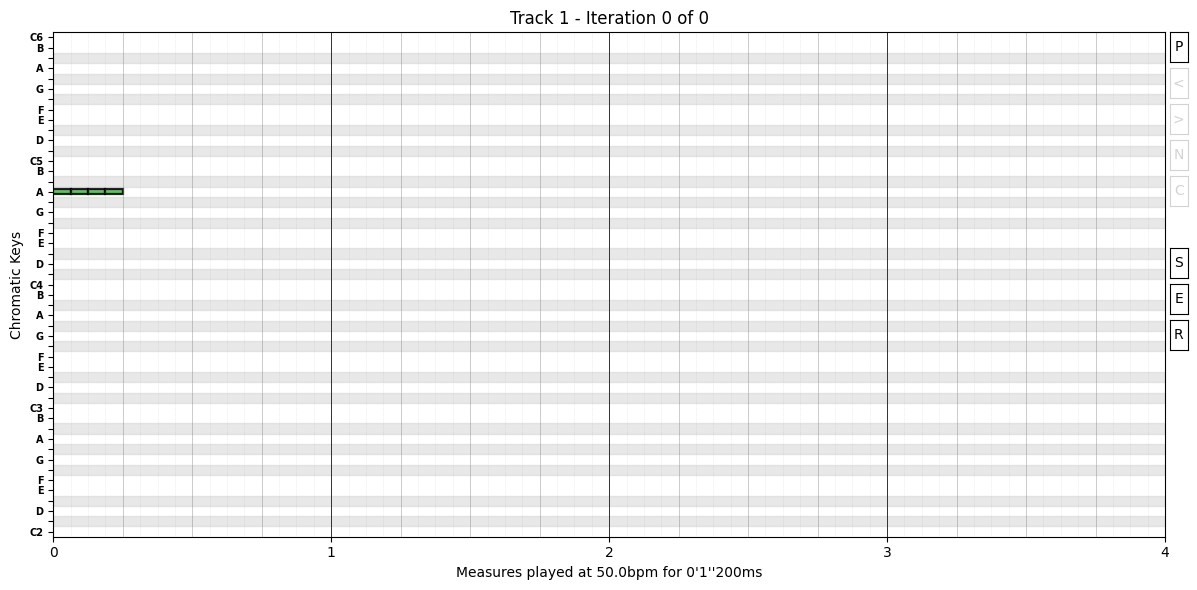

In [15]:
# This stack shall respect the Measure of the first `Element` (`Note`)
wrapped_notes = Note(1/16) / 4
wrapped_notes >> Plot()

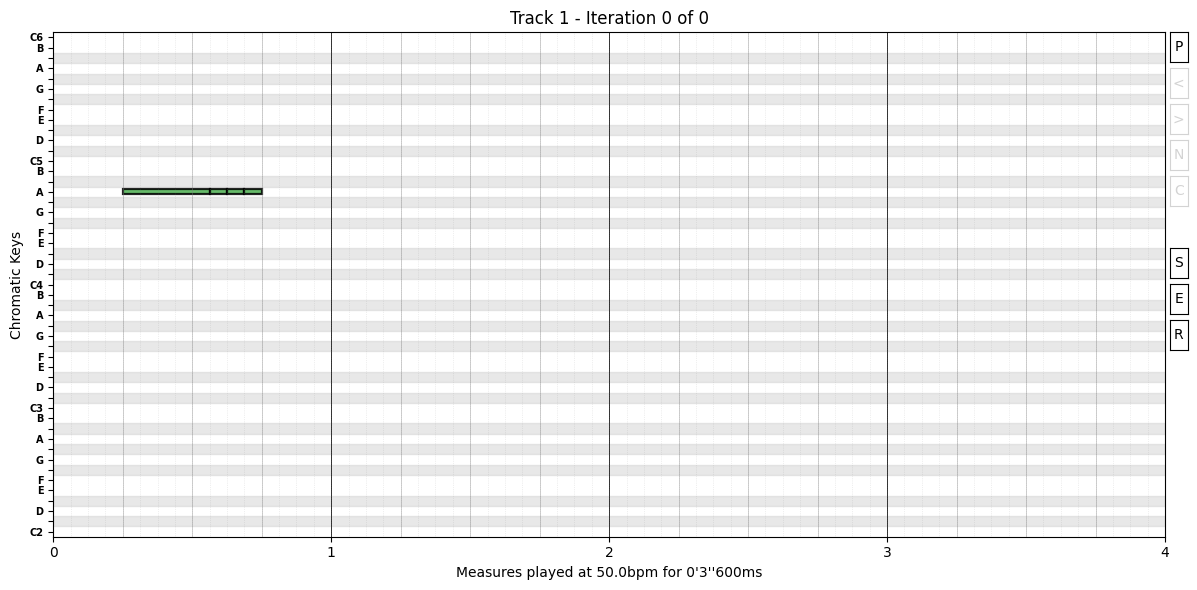

In [16]:
wrapped_notes << First()**(1/4 + 1/16)
wrapped_notes.stack().add(Beat(1))
wrapped_notes >> Plot()

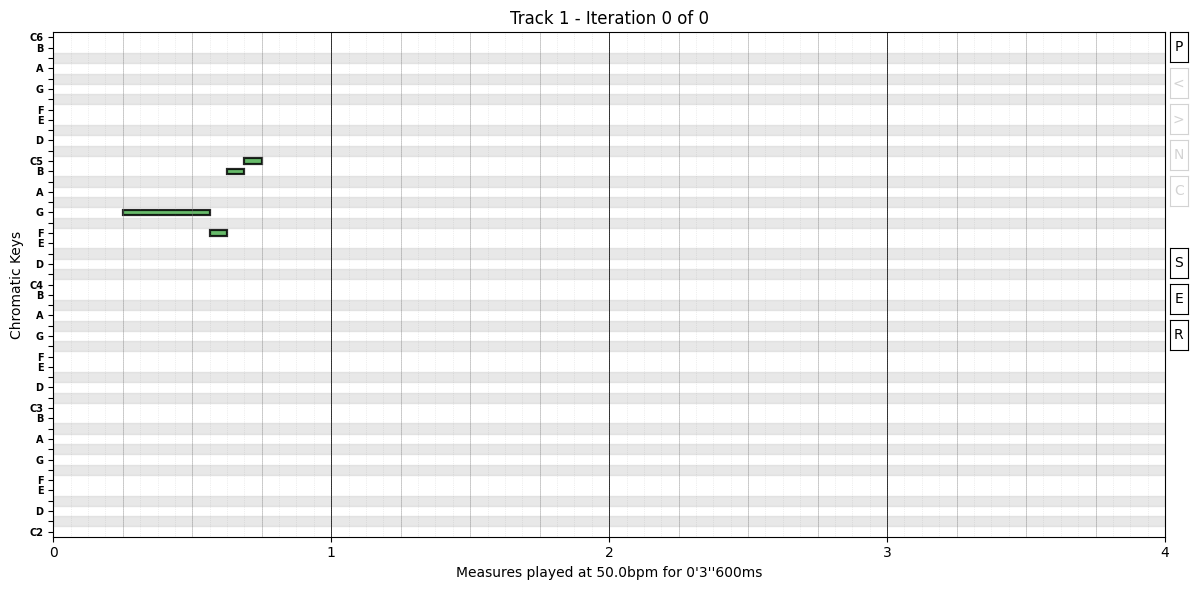

In [17]:
wrapped_notes += Foreach(-1, -2, +1, +2)**Degree()
wrapped_notes >> Plot()

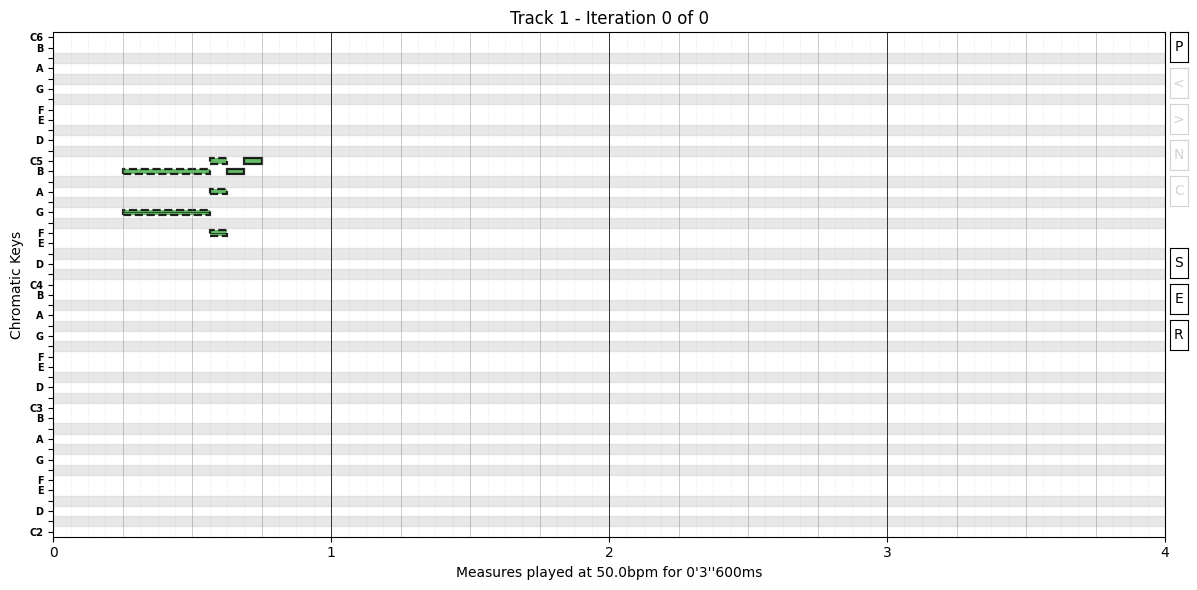

In [18]:
# It is always possible to wrap any `Element` into a different `Element` with the same common paramenters, so we can Wrap
# and preserve the same number of Notes (a Cluster is derived from a Note), or Elements, `>>=` does exactly that,
# bellow each Note is wrapped by a Cluster and thus is still possible to refer to the 2nd Note as still the 2nd Note !
wrapped_notes[First()] >>= Cluster([0, 2.0])
wrapped_notes[Nth(2)] >>= Cluster([0, 2.0, 4.0])
wrapped_notes >> Plot()

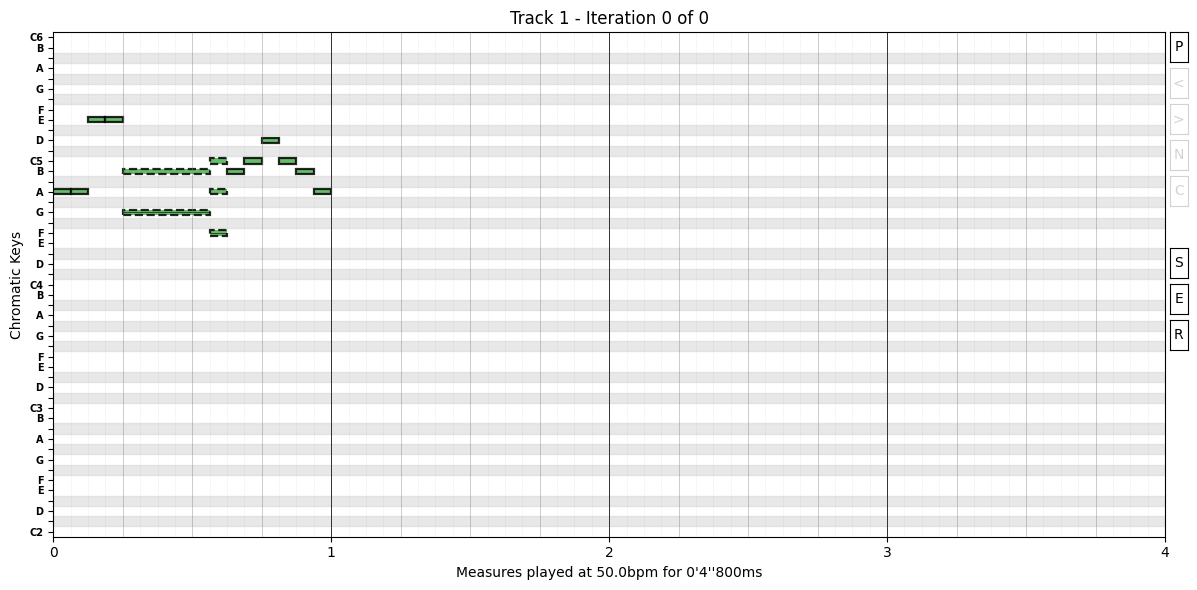

In [19]:
new_melody = outer_notes + wrapped_notes
new_melody >> Plot()

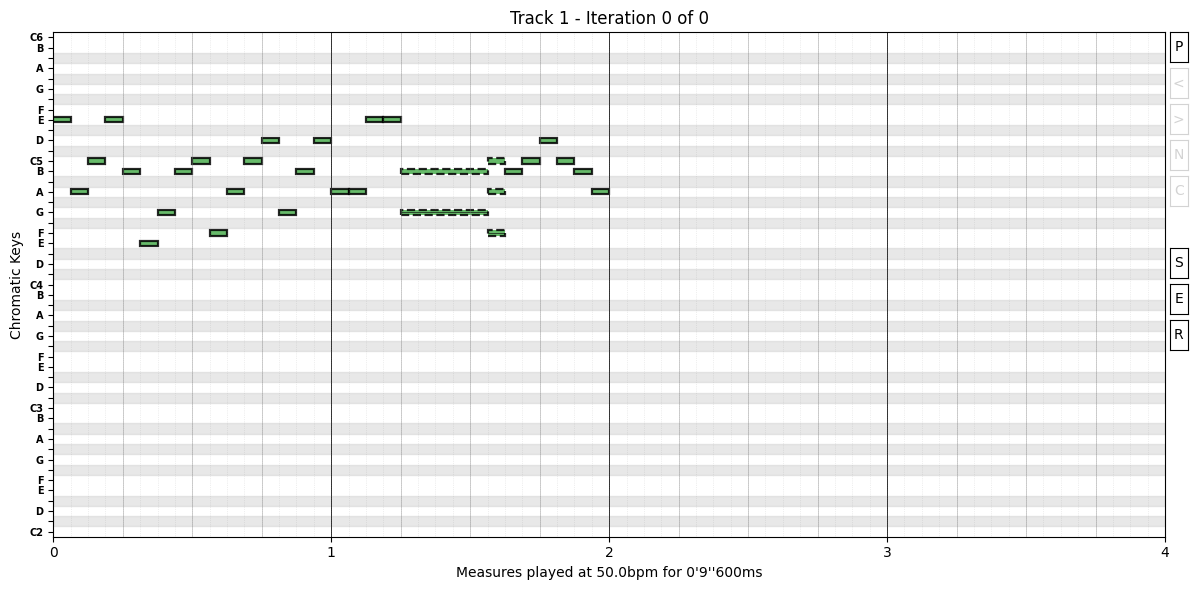

In [20]:
# Because Staff is able to repeat a given Measure we can also do something simmilar by `punching` omeasures into other Clips,
# so, we can do that by starting to create a `punching Clip`, like so:
punching_clip = treble_melody**Velocity( treble_melody[Last()] ) * new_melody    # `**` here works like << but with an implicit copy
punching_clip >> Plot()

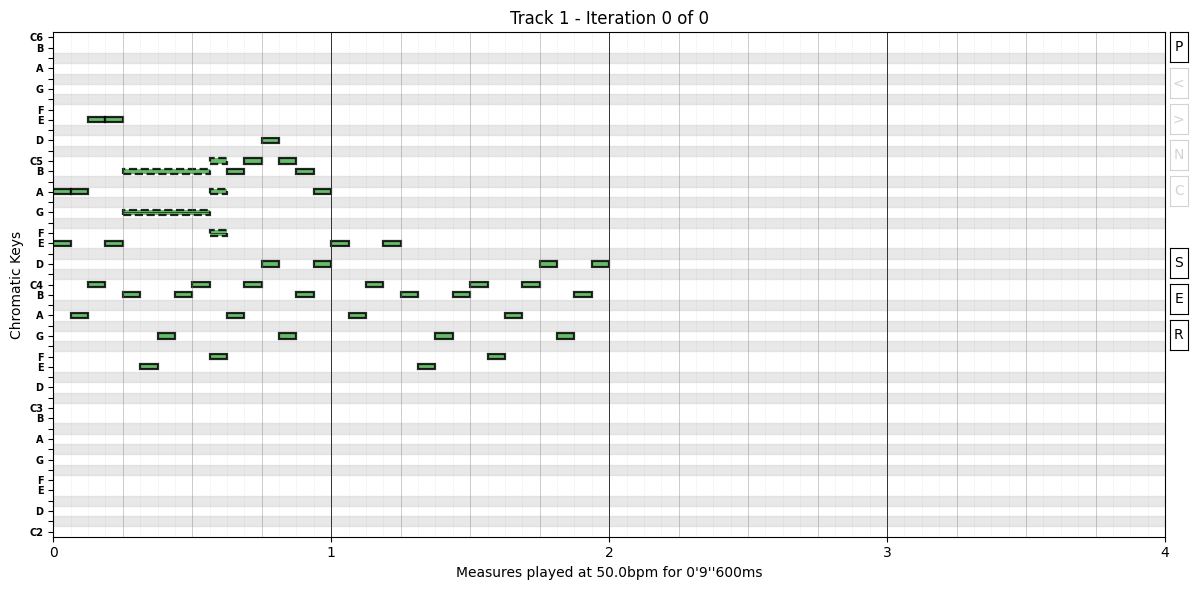

In [21]:
second_melody = new_melody + bass_melody * 2
second_melody << Velocity( bass_melody[Last()] ) >> Plot()

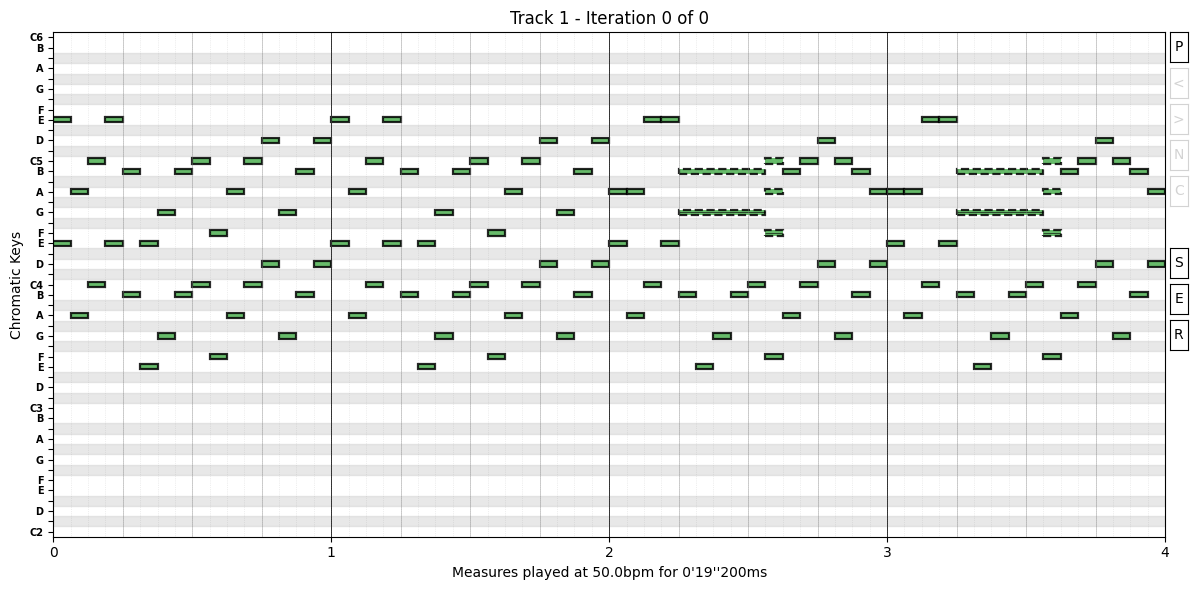

In [22]:
# Here besies setting parameters on the bass_melody implicit copy with `**`,
# we also pick up the 4 Measures in the punching_clip to be added to the bass_melody
four_bars = bass_melody**Velocity( treble_melody[Last()] ) * 4 + punching_clip * [0, 0, 1, 1]
four_bars >> Plot()

In [23]:
four_bars * 4 >> Play()

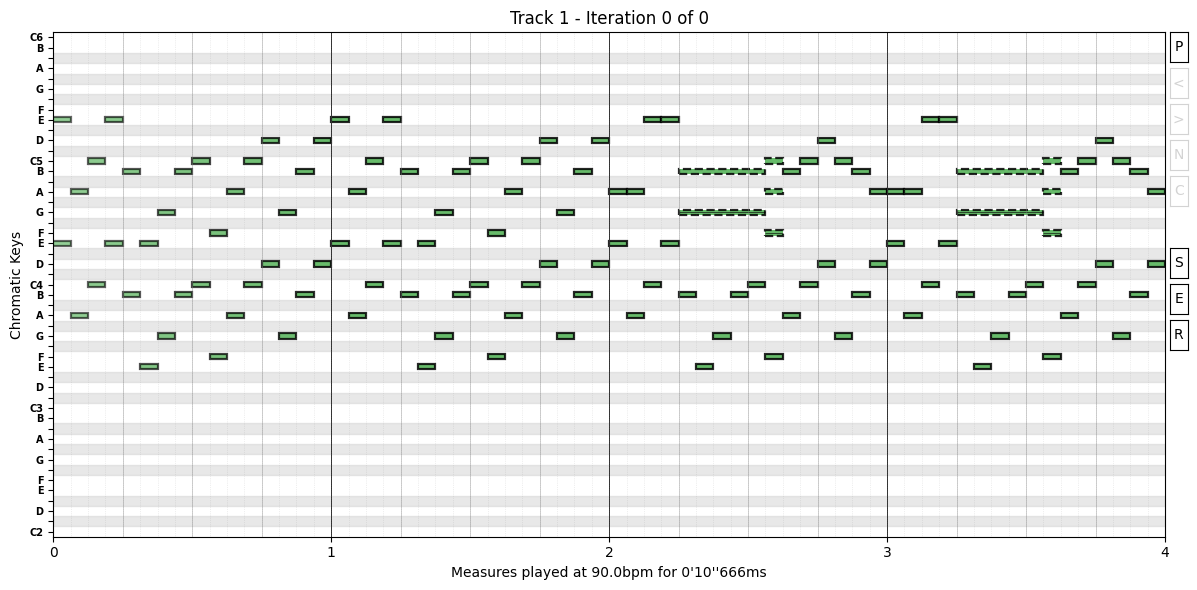

In [24]:
# Tempo is centralized in settings, so you can change the Tempo at any time like this
settings << Tempo(90)
# and we can also add the initial creascendo in the first bar in the same fascion like so
four_bars.mask(Measure(0)) << Get(Step())**Multiply(3)**Add(55)**Velocity()
four_bars >> Plot()

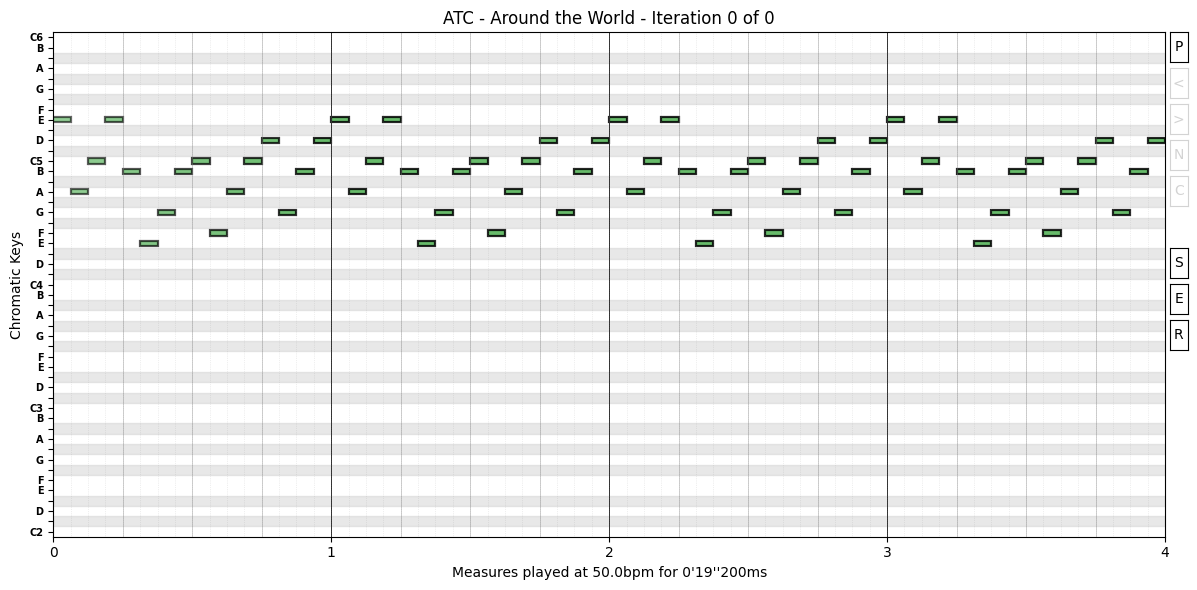

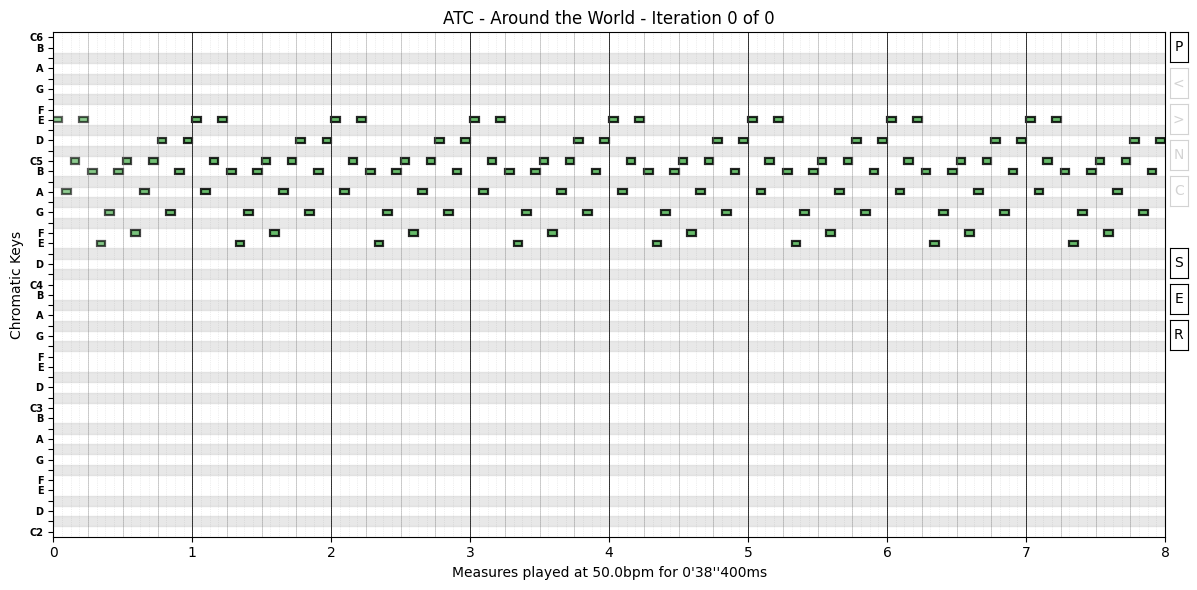

In [25]:
basic_melody = treble_melody * 4 << Greater(Measure(0))**Velocity( treble_melody[Last()] ) << TrackName("ATC - Around the World")
settings << Tempo(50)
basic_melody >> Plot()
basic_melody * (basic_melody * [1] * 4) >> Plot() >> Render()